In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Almond.csv')

In [3]:
df.shape

(2803, 14)

In [4]:
df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       1946 non-null   float64
 1   Width (minor axis)        1861 non-null   float64
 2   Thickness (depth)         1799 non-null   float64
 3   Area                      2803 non-null   float64
 4   Perimeter                 2803 non-null   float64
 5   Roundness                 1946 non-null   float64
 6   Solidity                  2803 non-null   float64
 7   Compactness               2803 non-null   float64
 8   Aspect Ratio              1004 non-null   float64
 9   Eccentricity              1004 non-null   float64
 10  Extent                    2803 non-null   float64
 11  Convex hull(convex area)  2803 non-null   float64
 12  Type                      2803 non-null   object 
dtypes: float64(12), object(1)
memory usage: 284.8+ KB


In [10]:
df.drop(['Aspect Ratio', 'Eccentricity'],axis=1,inplace=True)

In [11]:
cols = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 'Roundness']

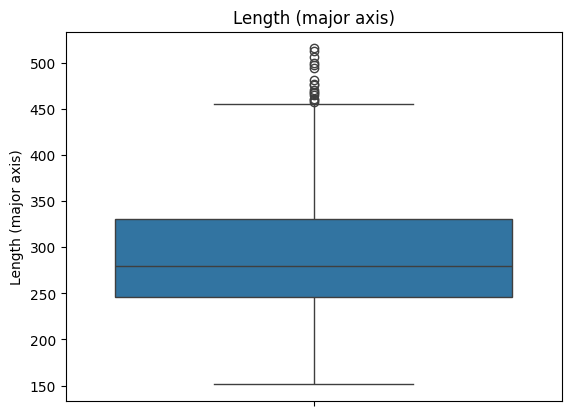

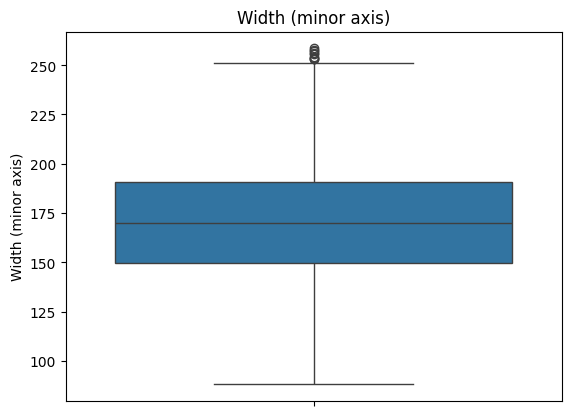

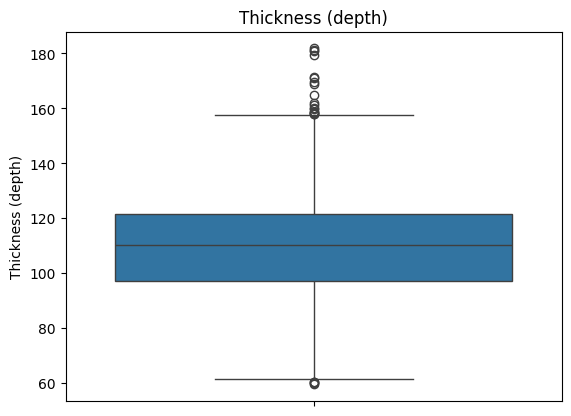

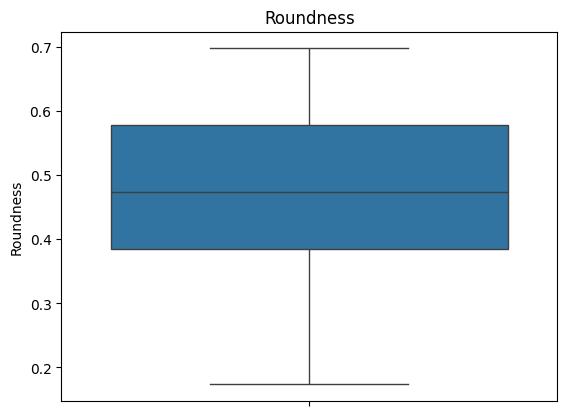

In [13]:
for col in cols:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [14]:
df['Roundness'] = df['Roundness'].fillna(df['Roundness'].mean())

In [15]:
for col in cols[:-1]:
  df[col] = df[col].fillna(df[col].median())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       2803 non-null   float64
 1   Width (minor axis)        2803 non-null   float64
 2   Thickness (depth)         2803 non-null   float64
 3   Area                      2803 non-null   float64
 4   Perimeter                 2803 non-null   float64
 5   Roundness                 2803 non-null   float64
 6   Solidity                  2803 non-null   float64
 7   Compactness               2803 non-null   float64
 8   Extent                    2803 non-null   float64
 9   Convex hull(convex area)  2803 non-null   float64
 10  Type                      2803 non-null   object 
dtypes: float64(10), object(1)
memory usage: 241.0+ KB


In [17]:
df['Type'].value_counts()

,count
Type,
SANORA,943
MAMRA,933
REGULAR,927


In [18]:
df['Type'] = df['Type'].map({'SANORA':0, 'MAMRA':1, 'REGULAR':2 })

In [19]:
X = df.drop('Type',axis=1)
y = df['Type']

In [20]:
X

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Extent,Convex hull(convex area)
0,279.879883,227.940628,127.759132,22619.0,643.813269,0.470466,0.973384,1.458265,0.681193,23237.5
1,279.879883,234.188126,128.199509,23038.0,680.984841,0.470466,0.957304,1.601844,0.656353,24065.5
2,279.879883,229.418610,125.796547,22386.5,646.943212,0.470466,0.967270,1.487772,0.683620,23144.0
3,279.879883,232.763153,125.918808,22578.5,661.227483,0.470466,0.965512,1.540979,0.685360,23385.0
4,279.879883,230.150742,107.253448,19068.0,624.842706,0.470466,0.951450,1.629395,0.714800,20041.0
...,...,...,...,...,...,...,...,...,...,...
2798,279.879883,192.709366,122.356506,18471.5,653.345233,0.470466,0.931000,1.838965,0.725739,19840.5
2799,279.879883,186.254745,118.708961,17213.5,581.688379,0.470466,0.952706,1.564234,0.714016,18068.0
2800,279.879883,186.196182,119.147224,17510.5,608.315795,0.470466,0.948821,1.681705,0.718999,18455.0
2801,279.879883,188.660828,120.634438,17941.0,630.759446,0.470466,0.944810,1.764701,0.738191,18989.0


In [21]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
2798,0
2799,0
2800,0
2801,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
model = AdaBoostClassifier()
model

AdaBoostClassifier()

In [26]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6185383244206774


In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5, 2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

In [32]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0, 1.5, 2.0],
                         'n_estimators': [50, 100, 200]})

In [33]:
grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}

In [34]:
grid.best_score_

0.6654778475978365

In [35]:
y_pred_grid = grid.predict(X_test)

In [37]:
print(accuracy_score(y_test, y_pred_grid))

0.6274509803921569
